# hyperparameters for ( Random Forest regressor )
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}
 ### -------------------------------------
1. n_estimators = Total number of trees: 100, 2000 ,3000 , 50 

2. max_features = Number of features to consider for spliting at each leaf node: {'auto','sqrt','log', int , float }

3. max_leaf_nodes = Controling no. of leaf_nodes : int

4. min_impurity_decrese = A node will be split if this split induces a decrease of the impurity greater than or equal to this value.The weighted impurity decrease equation is the following:

N_t / N * (impurity - N_t_R / N_t * right_impurity
                    - N_t_L / N_t * left_impurity)
where N is the total number of samples, N_t is the number of samples at the current node, N_t_L is the number of samples in the left child, and N_t_R is the number of samples in the right child.

N, N_t, N_t_R and N_t_L all refer to the weighted sum, if sample_weight is passed.

5. min_impurity_split = Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf. ( min_impurity_decrese is better than this !!! )

5. Criterion = {'mse', 'mae' }

6. max_depth = The maximum depth of the tree : int

7. BootStrap = Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.

8. OOB_score = Weather to use out-of-bag sample : Bool

9. max_features = No. of features to consider when looking for best split.



1. Random Forest is Top of Classification Models.

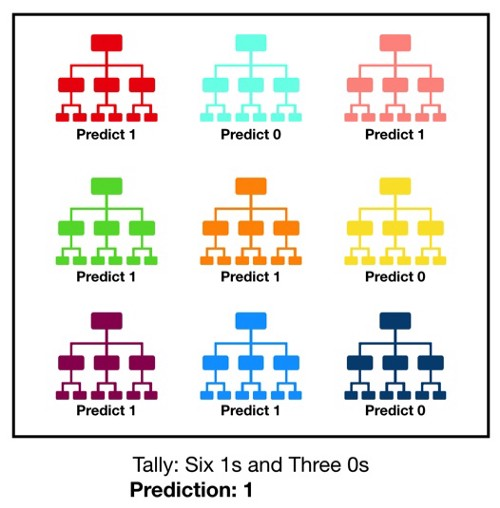

The reason Random Forest Works Well is :
### "A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models."

 The reason for Uncorrelated effect is that the trees protect each other from their individual errors
 
 Chances of getting correct Predictions increase with the number of uncorrelated Trees .( The more they are the more likely the we get correct predictions ).

### Prereqestics for Random Forest to perform Well are :

1.There needs to be some actual signal in our features so that models built using those features do better than random guessing.

2.The predictions made by the individual trees need to have low correlations with each other .

### Note Decision Trees are very Sensitive to the Data they are trained on , small changes can result in bigger Tree structure .

Bagging  : Random Forest allows each individual tree to randomly sample from DataSet with replacement .

Notice that in bagging we are not subsetting the Data into smaller chunks , If we have a DataSet of length N then we are still feeding each Tree with Training size of N random sample with replacement ( however specified otherwise ).
### For Example :
For example, if our training data was [1, 2, 3, 4, 5, 6] then we might give one of our trees the following list [1, 2, 2, 3, 6, 6]. Notice that both lists are of length six and that “2” and “6” are both repeated in the randomly selected training data we give to our tree (because we sample with replacement).

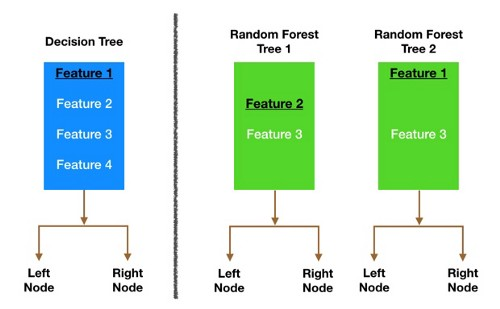

In [ ]:
Search for "Feature Bagging"

Suppose we have 10 features f1, f2, ..., f9, f10, then when we take a subset to let's suppose f1, f3, f4, f8 of features at tree level itself, then we construct the whole tree taking these 4 features into consideration.

We calculate the entropy, compare only these 4 features at every node and take that feature that yields maximum entropy. This isn't much use as we are restricting our tree learning to only those 4 features. Contrary to this, when we take some subset of features let's say f1, f8, f9 at first node, we calculate the entropy and compare them among these 3 features and chose the one that gives maximum value. Instead of growing the tree further with same features, we chose another subset of features let's say f4, f7, f2 and make the split based on these features. Suppose f8 was selected at the first node and f2 was selected at the second node. Model is able to learn the relationship between these both which wouldn't be possible if there is some other feature that gives maximum entropy than f2 after f8 has been selected as the root node.

In this way, the model can learn the relationship between different features in a more diversified way.

Each tree gets the full set of features, but at each node, only a random subset of features is considered.

### In the original paper on random forests, it was shown that the forest error rate depends on two things:

1. The correlation between any two trees in the forest. Increasing the correlation increases the forest error rate.

2. The strength of each individual tree in the forest. A tree with a low error rate is a strong classifier. Increasing the strength of the individual trees decreases the forest error rate.

### OOB ( out-of-bag) : 
Is used to get an ubaised estimate of classification errors.

### Proximities :
Prximities are used for locating outliers , missing values and producing views of Data .

### OOB error estimate :
We measure the how accurate our RF is performing by proportion of samples thet were corretly classified by the RF.

OOB-Error Estimate : The proportion of times that j is not equal to true class of n aeraged overall cases .

### Gini : Gini Impurity tells us what is the probability of misclassifying an observation.
1-[(Pa)^2 + (Pb)^2]

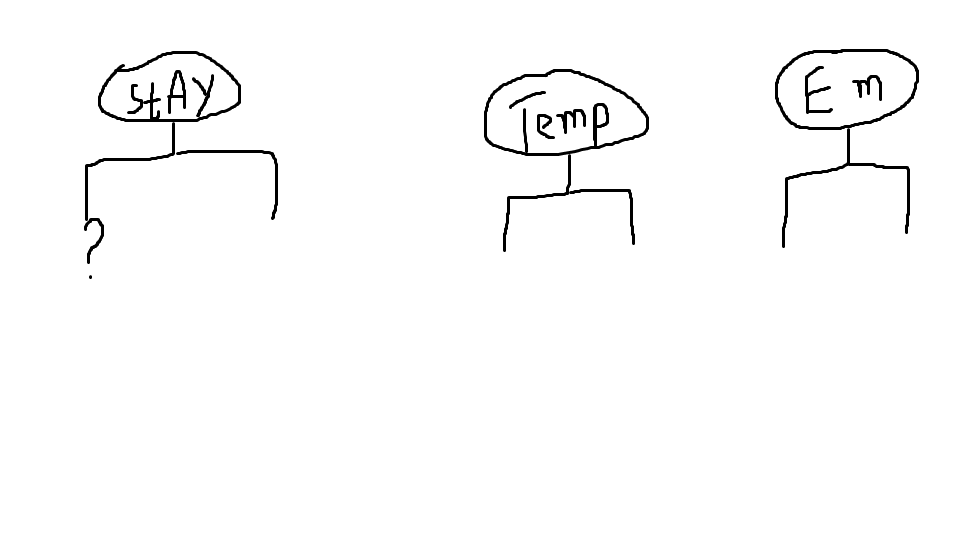

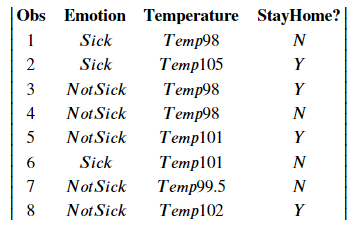

In [4]:
gini_sick = 1 - ((2/3)**2 + (1/3)**2) # This is gini of single split
gini_not_sick = 1 - ((3/5)**2 + (2/5)**2) # this is gini of single split
""" P_L*gini_sick + P_R*gini_not_sick """ 
gini_Emotion = (3/8)*gini_sick + (5/8)*gini_not_sick 
gini_Emotion # This gini of node.

0.4666666666666667

In [9]:
# Average >100 and <100
gini_above_100 = 1 - ((3/4)**2 + (1/4)**2) # This is gini of single split
gini_below_100 = 1 - ((1/4)**2 + (3/4)**2) # this is gini of single split
""" P_L*gini_sick + P_R*gini_not_sick """ 
gini_Temp = (4/8)*gini_above_100 + (4/8)*gini_below_100
gini_Temp # Node Gini
# So now Temparature is selected for node bcz it has less gini impurity as compared to Emotion

0.375